### Importing some Important libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline

### Load CSV file to perform Linear Regression with Single variable (2 dimension)

In [14]:
canada = pd.read_csv("canada_per_capita_income.csv")
canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [15]:
canada.info()

## calling info method to find out whether or not it includes any null values and what are the dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


### Define Linear Model

In [16]:
## linear model

reg = linear_model.LinearRegression()

In [17]:
## now we fit the training data
## note here we are using all data as training for now
## here,our Independent feature is Year and Dependent feature is Price!! 

reg.fit(canada[["year"]], canada["per capita income (US$)"])

LinearRegression()

In [18]:
## linear equation is,   y = mx + b
## y is our prediction, m is coefficient, x is a variable, b is intercept at y axis of best fit line
## y is income and x is year

In [19]:
reg.predict([[2017]])

## y = per capita income 2017 prediction on x variable = 2017 as a year

array([38803.29886875])

In [20]:
reg.coef_

## value of m

array([828.46507522])

In [21]:
reg.intercept_

## value of b

-1632210.7578554575

In [22]:
## so, y = 828.46507522*(year) + (-1632210.7578554575)
828.46507522*(2017) + (-1632210.7578554575)

## both same values

38803.29886328266

## Predicting next five years income

In [23]:
nxt_year = pd.DataFrame({
    
    "year" : [2017, 2018, 2019, 2020, 2021]
})

In [24]:
nxt_year

,year
0,2017
1,2018
2,2019
3,2020
4,2021


In [25]:
nxt_year["per capita income (US$)"] = reg.predict(nxt_year)

## adding the prediction for next five years into dataframe

In [26]:
nxt_year

,year,per capita income (US$)
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170


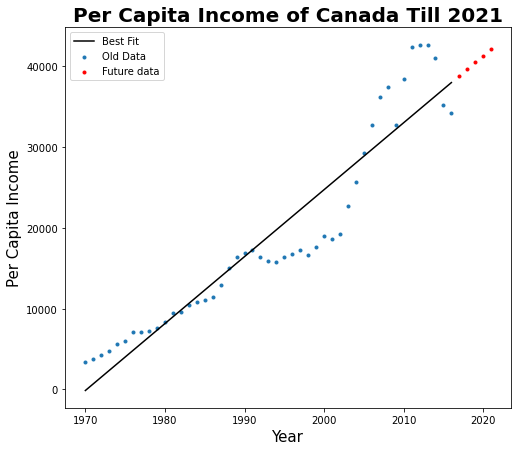

In [27]:
plt.figure(figsize = (8,7))
plt.scatter(x = canada["year"], y = canada["per capita income (US$)"], marker = ".", label = "Old Data")
plt.scatter(x = nxt_year["year"], y = nxt_year["per capita income (US$)"], marker = ".", color = "r", label = "Future data")
plt.plot(canada["year"], reg.predict(canada[["year"]]), color = "Black", label = "Best Fit")


plt.xlabel("Year", fontsize = 15)
plt.ylabel("Per Capita Income", fontsize = 15)
plt.title("Per Capita Income of Canada Till 2021", fontdict = { "fontweight" : "bold", "fontsize" : 20})

plt.legend()
plt.show()

## here, the blue dots are available data
## red dots are next five year prediction
## black line is best fit

## Multi Variable

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

%matplotlib inline

In [29]:
hire = pd.read_csv("hiring.csv")

In [30]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### fill NaN data in "experience" Feature

In [31]:
hire["experience"].fillna(value = "Zero", inplace = True)

## only for experience column

In [32]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### Converting words into digits for experience column

In [33]:
def fun(word):
    return w2n.word_to_num(str(word))

In [34]:
# hire["experience"].replace({"Zero" : 0, "two" : 2, "three": 3, "five": 5, "seven": 7, "ten": 10, "eleven": 11}, inplace = True)

In [35]:
hire["experience"] = hire["experience"].apply(fun)

In [36]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


### cannot just set directly 0 for test_score, instead take mean/median of all value

In [37]:
mean_test = hire["test_score(out of 10)"].mean()
test_nan = int(mean_test)
test_nan

## take it as int 7

7

In [38]:
hire["test_score(out of 10)"].fillna(value = test_nan, inplace = True)

In [39]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


### Looks good, Fit the model

In [40]:
reg = linear_model.LinearRegression()
## parenthesis is important

In [41]:
reg.fit(hire[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], hire["salary($)"])

LinearRegression()

In [42]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [43]:
reg.intercept_

14992.65144669314

In [44]:
## y = m1x1 + m2x2 + m3x3

## Salary = 2922.26901502*experience + 2221.30909959*test_score(out of 10) + 2147.48256637*interview_score(out of 10)

In [45]:
reg.predict([[12, 10, 10]])

array([93747.79628651])

## Saving a model to use it directly

In [46]:
import joblib ## one of the module from sklearn

In [47]:
joblib.dump(reg, "Employee Prediction")

## i used reg name to define linear regression
## now its saved

['Employee Prediction']

In [48]:
## to load

use_model = joblib.load("Employee Prediction")
use_model

LinearRegression()

In [49]:
use_model.predict([[12, 10, 10]])

array([93747.79628651])

In [50]:
reg.predict([[12, 10, 10]])

array([93747.79628651])

In [51]:
## both same

### Ttraining and Test data divide to avoid "Overfitting" of Model

In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [71]:
car = pd.read_csv("carprices.csv")

In [72]:
car.drop("Car Model", axis = "columns", inplace = True)

In [73]:
car

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


In [74]:
## define X and y

In [75]:
X = car[["Mileage", "Age(yrs)"]]

In [76]:

y = car["Sell Price($)"]

In [77]:
# X = sm.add_constant(X1)
# results = sm.OLS(y,X).fit()
# results.summary()

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## test data size = 20% of full data

In [80]:
## now fit the model

In [81]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
reg.coef_

array([-3.12941899e-01, -1.01023234e+03])

In [83]:
reg.intercept_

50398.04013442773

In [84]:
reg.predict(X_test)
## predicted Y_test

array([31961.7834292 , 18604.00374847, 27509.19020229])

In [85]:
y_test

## original y_test

4     31500
11    21000
2     26100
Name: Sell Price($), dtype: int64

In [86]:
Accuracty = reg.score(X_test, y_test)

In [87]:
Accuracty*100

85.60054588488104